In [1]:
import pandas as pd

In [2]:
content = pd.read_csv("./dataset/train.csv")

In [3]:
content.head(5)

,id,label,label_desc,sentence
0,0,108,news_edu,上课时学生手机响个不停，老师一怒之下把手机摔了，家长拿发票让老师赔，大家怎么看待这种事？
1,1,104,news_finance,商赢环球股份有限公司关于延期回复上海证券交易所对公司2017年年度报告的事后审核问询函的公告
2,2,106,news_house,通过中介公司买了二手房，首付都付了，现在卖家不想卖了。怎么处理？
3,3,112,news_travel,2018年去俄罗斯看世界杯得花多少钱？
4,4,109,news_tech,剃须刀的个性革新，雷明登天猫定制版新品首发


In [4]:
len(content)

53360

In [5]:
from collections import defaultdict

In [6]:
from collections import Counter

In [9]:
labels = content.label.values

In [10]:
labels.shape

(53360,)

In [11]:
id_counter = Counter(content.label.values)

In [12]:
id_counter

Counter({108: 3437,
         104: 5200,
         106: 2107,
         112: 3368,
         109: 5955,
         103: 3991,
         116: 3390,
         101: 4081,
         107: 4118,
         100: 1111,
         102: 4976,
         110: 3632,
         115: 2886,
         113: 4851,
         114: 257})

In [13]:
len(id_counter)

15

In [19]:
for _id, value in id_counter.items():
    print(_id, value / len(content) * 100, '%')

108 6.441154422788606 %
104 9.745127436281859 %
106 3.948650674662669 %
112 6.31184407796102 %
109 11.160044977511244 %
103 7.479385307346327 %
116 6.353073463268366 %
101 7.648050974512744 %
107 7.717391304347826 %
100 2.0820839580209896 %
102 9.325337331334332 %
110 6.806596701649176 %
115 5.408545727136431 %
113 9.091079460269864 %
114 0.48163418290854576 %


- baseline最低也要有`11.6%`的准确率，因为我什么也不做全都预测`109`也会得到`11.6%`的准确率

In [21]:
content[content['label'] == 102]

,id,label,label_desc,sentence
16,16,102,news_entertainment,什么是人情，什么是世故？
21,21,102,news_entertainment,夫妻间能不能互看手机？
36,36,102,news_entertainment,大猩猩对镜头摆造型表情丰富，走红网络收获众多迷妹
41,41,102,news_entertainment,抱娃姿势不正确，小心患熊黛林同款“妈妈手”
48,48,102,news_entertainment,中国传媒大学：平昌冬奥会闭幕式“北京八分钟”主创交流会举行
...,...,...,...,...
53341,53341,102,news_entertainment,美过范冰冰演丑女走红，地震认领儿童人美心善，嫁渣男婚后成这样
53344,53344,102,news_entertainment,鲵们的新手绘，完美曲线的吴亦凡小公举
53348,53348,102,news_entertainment,90后演员扛把子张一山，网友：明明可以靠脸吃饭，偏偏要靠实力
53349,53349,102,news_entertainment,观世音菩萨降临人间，一听“杀”字就啼哭不止，善哉善哉


In [23]:
content['sentence_len'] = content['sentence'].apply(len)

In [25]:
import matplotlib.pyplot as plt

(array([1.3200e+04, 3.5145e+04, 4.9100e+03, 1.0200e+02, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  2. ,  16.3,  30.6,  44.9,  59.2,  73.5,  87.8, 102.1, 116.4,
        130.7, 145. ]),
 <BarContainer object of 10 artists>)

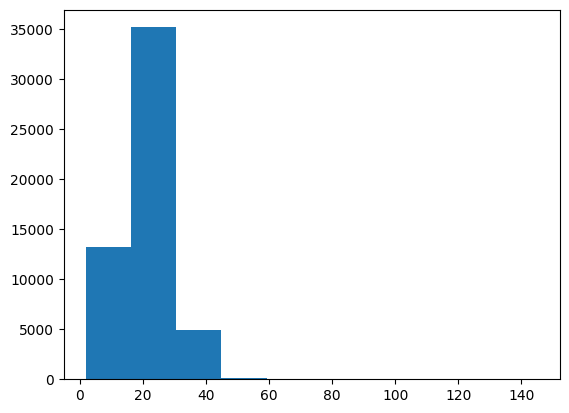

In [27]:
plt.hist(content['sentence_len'])

(array([2.200e+01, 6.210e+02, 2.313e+03, 4.475e+03, 5.769e+03, 6.698e+03,
        6.917e+03, 4.824e+03, 7.290e+03, 9.416e+03, 2.974e+03, 9.350e+02,
        5.870e+02, 3.000e+02, 1.140e+02, 4.600e+01, 3.500e+01, 1.000e+01,
        6.000e+00, 5.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  2.  ,   4.86,   7.72,  10.58,  13.44,  16.3 ,  19.16,  22.02,
         24.88,  27.74,  30.6 ,  33.46,  36.32,  39.18,  42.04,  44.9 ,
         47.76,  50.62,  53.48,  56.34,  59.2 ,  62.06,  64.92,  67.78,
         70.64,  73.5 ,  76.36,  79.22,  82.08,  84.94,  87.8 ,  90.66,
         93.52,  96.38,  99.24, 102.1 , 104.96, 107.82, 110.68, 113.54,
        116.4 , 

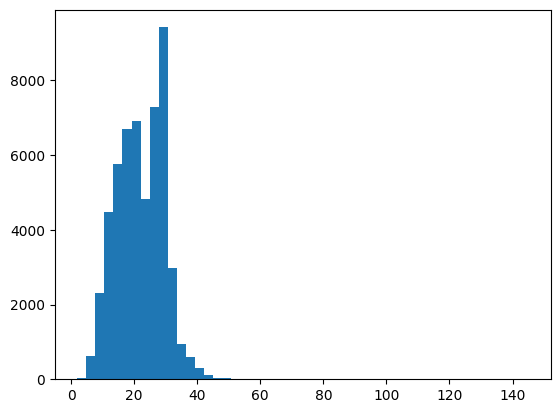

In [28]:
plt.hist(content['sentence_len'], bins=50)

In [29]:
import numpy as np

In [30]:
np.mean(content['sentence_len'])

22.13124062968516

In [31]:
np.std(content['sentence_len'])

7.30979185795089

In [32]:
np.max(content['sentence_len'])

145

In [33]:
np.min(content['sentence_len'])

2

In [40]:
len(np.where(content['sentence_len'] < 30)[0]) / len(content)

0.8278298350824588

In [41]:
len(np.where(content['sentence_len'] < 33)[0]) / len(content)

0.9512368815592204

In [42]:
len(np.where(content['sentence_len'] < 22 + 7.3 * 1.5)[0]) / len(content)

0.9512368815592204

- `1.5`是经验值

In [44]:
import jieba

In [45]:
def cut(string):
    return list(jieba.cut(string))

In [46]:
content['words'] = content['sentence'].apply(cut)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\reid\AppData\Local\Temp\jieba.cache
Loading model cost 0.999 seconds.
Prefix dict has been built successfully.


In [47]:
content.head(5)

,id,label,label_desc,sentence,sentence_len,words
0,0,108,news_edu,上课时学生手机响个不停，老师一怒之下把手机摔了，家长拿发票让老师赔，大家怎么看待这种事？,44,"[上课时, 学生, 手机, 响个, 不停, ，, 老师, 一怒之下, 把, 手机, 摔, 了..."
1,1,104,news_finance,商赢环球股份有限公司关于延期回复上海证券交易所对公司2017年年度报告的事后审核问询函的公告,46,"[商赢, 环球, 股份, 有限公司, 关于, 延期, 回复, 上海证券交易所, 对, 公司,..."
2,2,106,news_house,通过中介公司买了二手房，首付都付了，现在卖家不想卖了。怎么处理？,32,"[通过, 中介, 公司, 买, 了, 二手房, ，, 首付, 都, 付, 了, ，, 现在,..."
3,3,112,news_travel,2018年去俄罗斯看世界杯得花多少钱？,19,"[2018, 年, 去, 俄罗斯, 看, 世界杯, 得花, 多少, 钱, ？]"
4,4,109,news_tech,剃须刀的个性革新，雷明登天猫定制版新品首发,21,"[剃须刀, 的, 个性, 革新, ，, 雷明登, 天猫, 定制, 版, 新品, 首发]"


In [48]:
content['words'] = content['sentence'].apply(lambda s: ' '.join(cut(s)))

In [49]:
content.head(5)

,id,label,label_desc,sentence,sentence_len,words
0,0,108,news_edu,上课时学生手机响个不停，老师一怒之下把手机摔了，家长拿发票让老师赔，大家怎么看待这种事？,44,上课时 学生 手机 响个 不停 ， 老师 一怒之下 把 手机 摔 了 ， 家长 拿 发票 让...
1,1,104,news_finance,商赢环球股份有限公司关于延期回复上海证券交易所对公司2017年年度报告的事后审核问询函的公告,46,商赢 环球 股份 有限公司 关于 延期 回复 上海证券交易所 对 公司 2017 年 年度报...
2,2,106,news_house,通过中介公司买了二手房，首付都付了，现在卖家不想卖了。怎么处理？,32,通过 中介 公司 买 了 二手房 ， 首付 都 付 了 ， 现在 卖家 不想 卖 了 。 怎...
3,3,112,news_travel,2018年去俄罗斯看世界杯得花多少钱？,19,2018 年 去 俄罗斯 看 世界杯 得花 多少 钱 ？
4,4,109,news_tech,剃须刀的个性革新，雷明登天猫定制版新品首发,21,剃须刀 的 个性 革新 ， 雷明登 天猫 定制 版 新品 首发


In [50]:
content['words_len'] = content['words'].apply(lambda s: len(s.split()))

(array([5.200e+01, 9.590e+02, 1.305e+03, 4.840e+03, 3.254e+03, 7.498e+03,
        8.194e+03, 3.936e+03, 7.620e+03, 3.794e+03, 6.459e+03, 3.449e+03,
        7.860e+02, 6.690e+02, 1.700e+02, 2.520e+02, 7.400e+01, 1.400e+01,
        2.500e+01, 3.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 1. ,  2.6,  4.2,  5.8,  7.4,  9. , 10.6, 12.2, 13.8, 15.4, 17. ,
        18.6, 20.2, 21.8, 23.4, 25. , 26.6, 28.2, 29.8, 31.4, 33. , 34.6,
        36.2, 37.8, 39.4, 41. , 42.6, 44.2, 45.8, 47.4, 49. , 50.6, 52.2,
        53.8, 55.4, 57. , 58.6, 60.2, 61.8, 63.4, 65. , 66.6, 68.2, 69.8,
        71.4, 73. , 74.6, 76.2, 77.8, 79.4, 81. ]),
 <BarContainer object of 50 

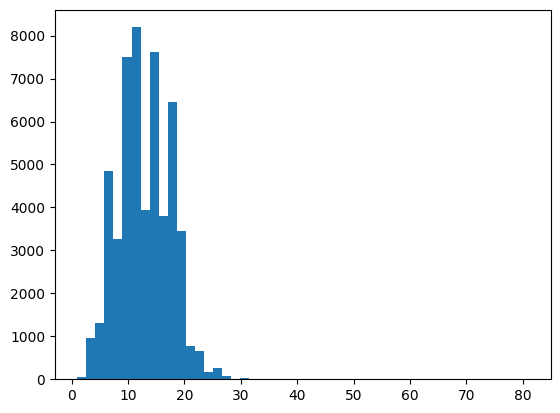

In [52]:
plt.hist(content['words_len'], bins=50)

In [54]:
words_len = content['words_len']

In [56]:
np.mean(words_len)

12.76617316341829

In [57]:
np.std(words_len)

4.53392084226197

In [59]:
len(np.where(words_len < 13 + 4.5 * 1.5)[0]) / len(content)

0.9368253373313343

In [61]:
content['words_keep'] = content['words'].apply(lambda s: ' '.join(s.split()[:20]))

In [64]:
content['words_keep'][1]

'商赢 环球 股份 有限公司 关于 延期 回复 上海证券交易所 对 公司 2017 年 年度报告 的 事后 审核 问询 函 的 公告'

In [65]:
content.to_csv('train_after_analysis.csv')

In [66]:
from functools import reduce

In [67]:
sentences = content['words_keep'].tolist()

In [69]:
sentences = map(lambda s: s.split(), sentences)

In [71]:
all_words = reduce(lambda a, b: a + b, sentences)

In [72]:
words_count = Counter(all_words)

In [73]:
words_count

Counter({'上课时': 61,
         '学生': 296,
         '手机': 844,
         '响个': 61,
         '不停': 77,
         '，': 34665,
         '老师': 274,
         '一怒之下': 63,
         '把': 686,
         '摔': 74,
         '了': 6694,
         '家长': 189,
         '拿': 260,
         '发票': 72,
         '让': 1180,
         '赔': 78,
         '商赢': 1,
         '环球': 17,
         '股份': 122,
         '有限公司': 74,
         '关于': 156,
         '延期': 9,
         '回复': 27,
         '上海证券交易所': 1,
         '对': 1757,
         '公司': 466,
         '2017': 193,
         '年': 1601,
         '年度报告': 2,
         '的': 21634,
         '事后': 7,
         '审核': 5,
         '问询': 3,
         '函': 4,
         '公告': 81,
         '通过': 101,
         '中介': 25,
         '买': 731,
         '二手房': 38,
         '首付': 37,
         '都': 2481,
         '付': 17,
         '现在': 789,
         '卖家': 11,
         '不想': 77,
         '卖': 264,
         '。': 245,
         '怎么': 2175,
         '处理': 60,
         '2018': 972,
         '去': 988,
    

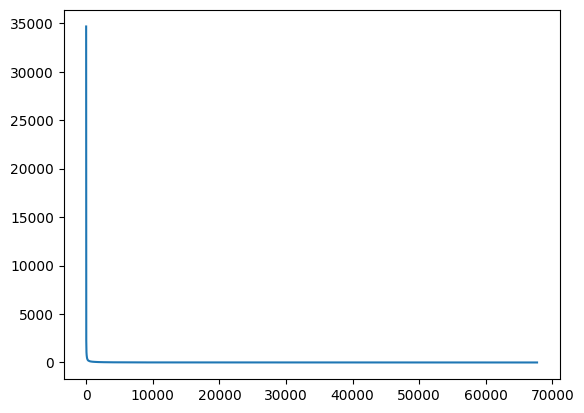

In [75]:
plt.plot(sorted(words_count.values(), reverse=True))

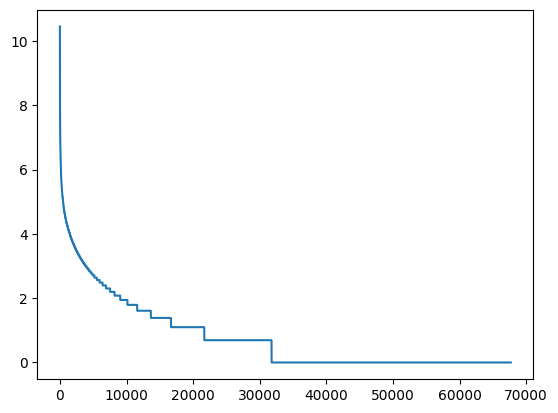

In [76]:
plt.plot(list(map(np.log, sorted(words_count.values(), reverse=True))))

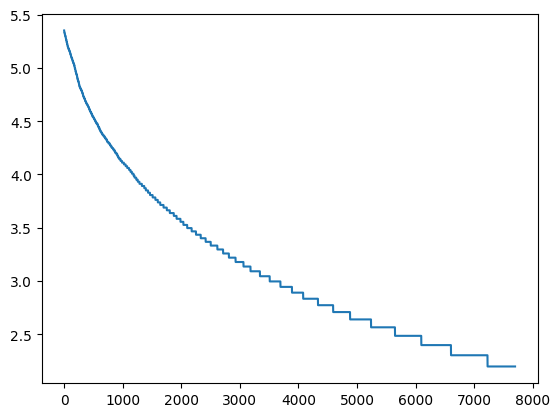

In [80]:
plt.plot(list(map(lambda n: np.log(n), sorted(words_count.values(), reverse=True)[300:8000])))

In [81]:
sorted(words_count.items(), key=lambda kv: kv[1], reverse=True)[:300]

[('，', 34665),
 ('？', 23205),
 ('的', 21634),
 ('！', 9332),
 ('：', 7684),
 ('了', 6694),
 ('是', 5824),
 ('“', 5551),
 ('”', 5471),
 ('你', 4839),
 ('有', 4042),
 ('在', 3987),
 ('吗', 3686),
 ('什么', 3059),
 ('中国', 2930),
 ('为什么', 2790),
 ('如何', 2679),
 ('都', 2481),
 ('和', 2447),
 ('人', 2260),
 ('怎么', 2175),
 ('《', 2137),
 ('被', 2130),
 ('不', 2127),
 ('》', 2125),
 ('、', 1840),
 ('会', 1769),
 ('对', 1757),
 ('我', 1755),
 ('美国', 1698),
 ('年', 1601),
 ('上', 1477),
 ('—', 1457),
 ('看', 1441),
 ('最', 1440),
 ('能', 1415),
 ('这', 1399),
 ('一个', 1291),
 ('要', 1272),
 ('好', 1271),
 ('还', 1267),
 ('就', 1256),
 ('将', 1255),
 ('后', 1251),
 ('与', 1234),
 ('大', 1232),
 ('中', 1184),
 ('让', 1180),
 ('哪些', 1173),
 ('5', 1064),
 ('他', 1060),
 ('世界', 1005),
 ('却', 996),
 ('去', 988),
 ('新', 981),
 ('到', 981),
 ('月', 980),
 ('2018', 972),
 ('谁', 969),
 ('可以', 928),
 ('多', 926),
 ('说', 924),
 ('也', 913),
 ('又', 906),
 ('上联', 885),
 ('个', 871),
 ('来', 863),
 ('网友', 852),
 ('如果', 847),
 ('手机', 844),
 ('下联', 838),
 ('

In [83]:
stopwords = [w for w, _ in sorted(words_count.items(), key=lambda kv: kv[1], reverse=True)[:300]]

In [85]:
with open("./stopwords.txt", 'w') as f:
    for w in stopwords:
        f.write(w + '\n')